/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Response Status Code: 200
Male count: 5457
Female count: 4543

France count: 5014
Germany count: 2509
Spain count: 2477

Credit Score:
Mean: 650.5288
Geometric Mean: 643.1174955238769
Mode: 850.0
Variance: 9341.860156575658
Standard Deviation: 96.65329873613035
Range for credit score: 500.0
Q1 for credit score: 584.0
Q2 for credit score: 652.0
Q3 for credit score: 718.0
Skewness for credit score: -0.07159586676212397
Kurtosis for credit score: -0.42611279176518124

Age:
Mean: 38.9218
Geometric Mean: 37.623442026693276
Mode: 37.0
Variance: 109.99408416841685
Standard Deviation: 10.48780645170461
Range for age: 74.0
Q1 for age: 32.0
Q2 for age: 37.0
Q3 for age: 44.0
Skewness for age: 1.0111685586628079
Kurtosis for age: 1.3940495456392599

The correlation between age and credit score: -0.003964905525390039

Tenure:
Mean: 5.0128
Geometric Mean: 0.0
Mode: 2.0
Variance: 8.364672627262726
Standard Deviation: 2.8921743770496837
Range for tenure: 10.0
Q1 for tenure: 3.0
Q2 for tenure: 5.0
Q3 f

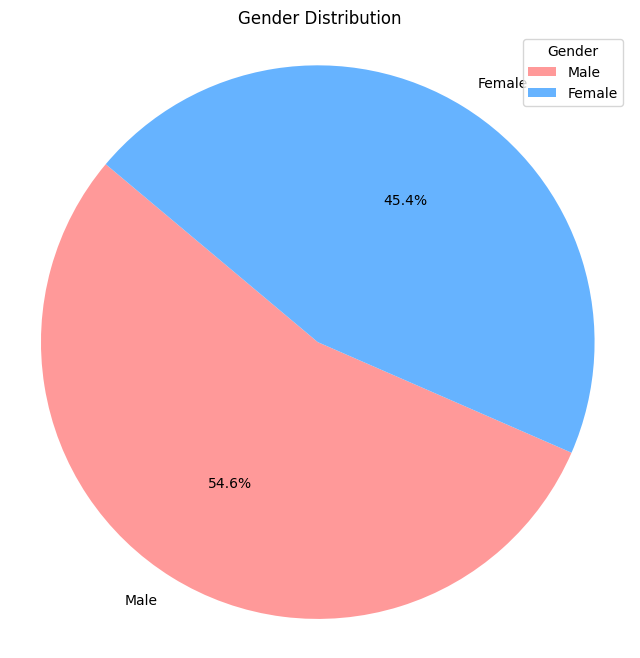


Gender labels: ['Male', 'Female']
Gender counts: [5457, 4543]


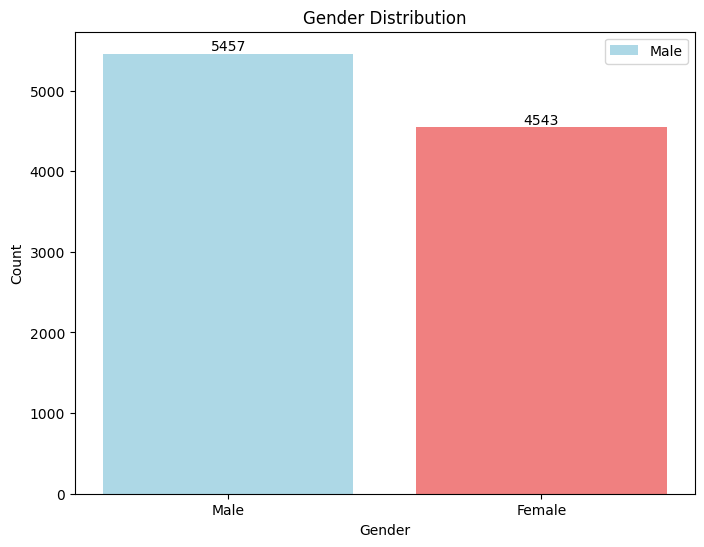


Country labels: ['France', 'Germany', 'Spain']
Country population: [5014, 2509, 2477]


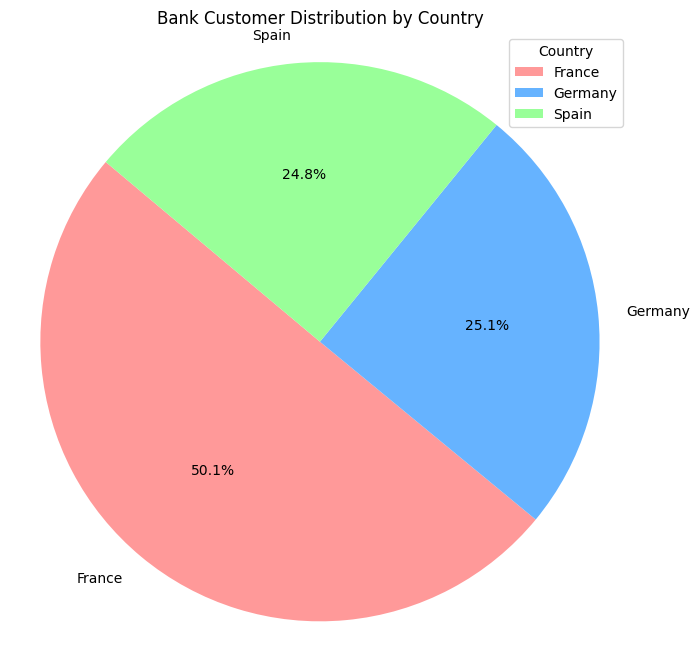



Churn labels: ['Churnned', 'Not Churn']
Churn counts: [2037, 7963]


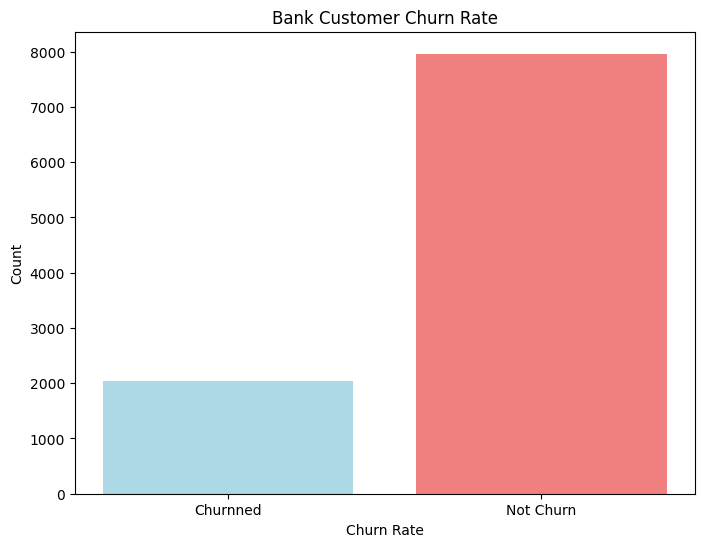



Churn Rate for Males: 16.455928165658786
Churn Rate for Females: 25.071538630860662


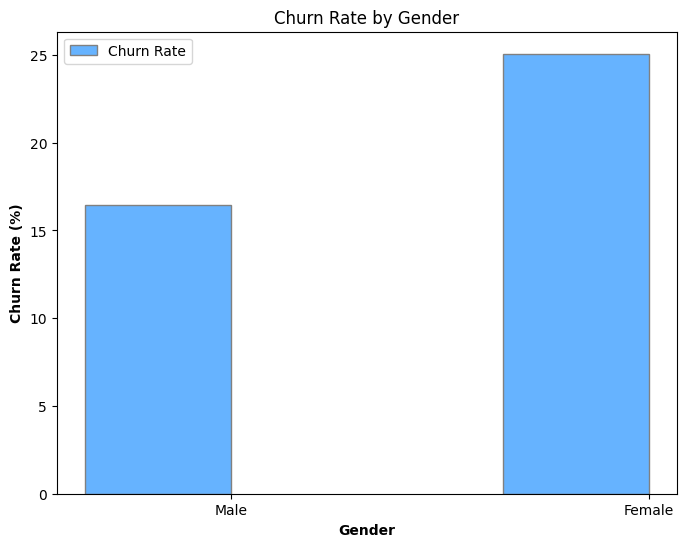


Churn Rates by Country:
france: 16.15%
germany: 32.44%
spain: 16.67%


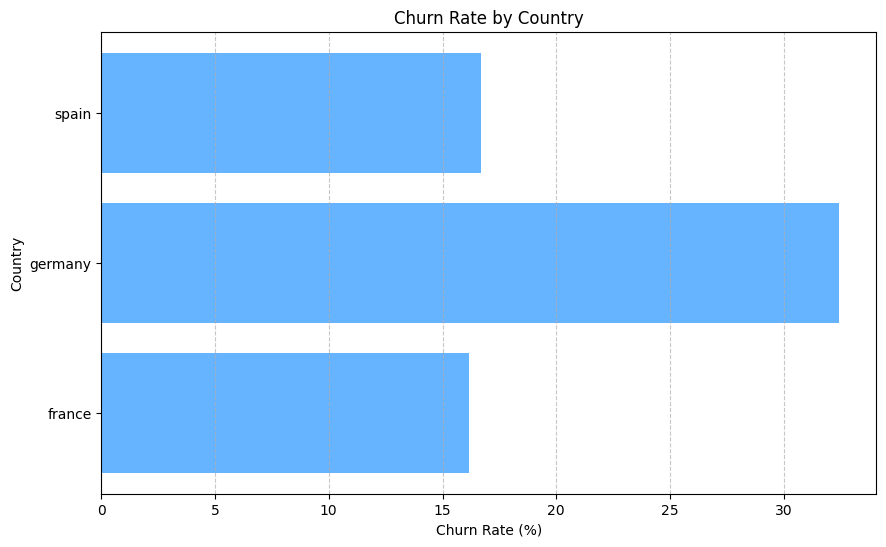


Zero Balance Customers: 3617
Active Customers: (5151, 4849)
Customers with Credit Cards: 7055


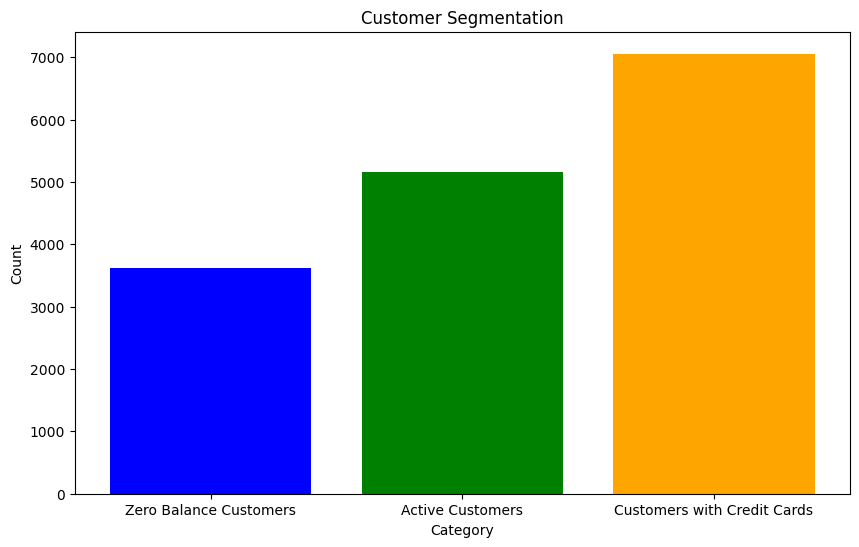

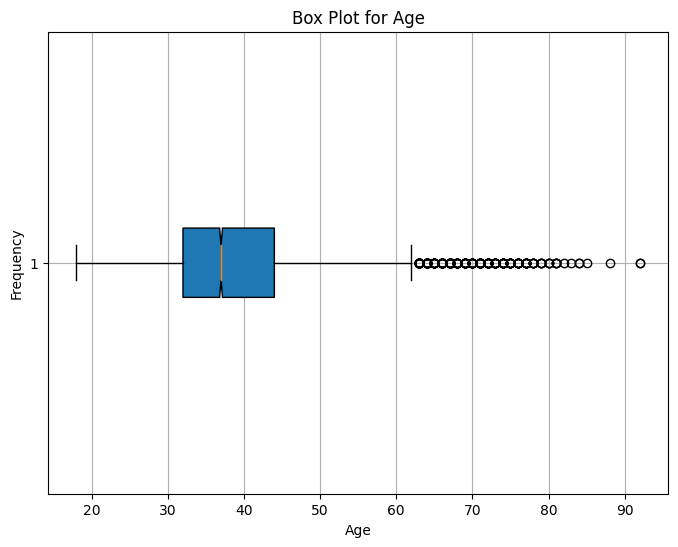

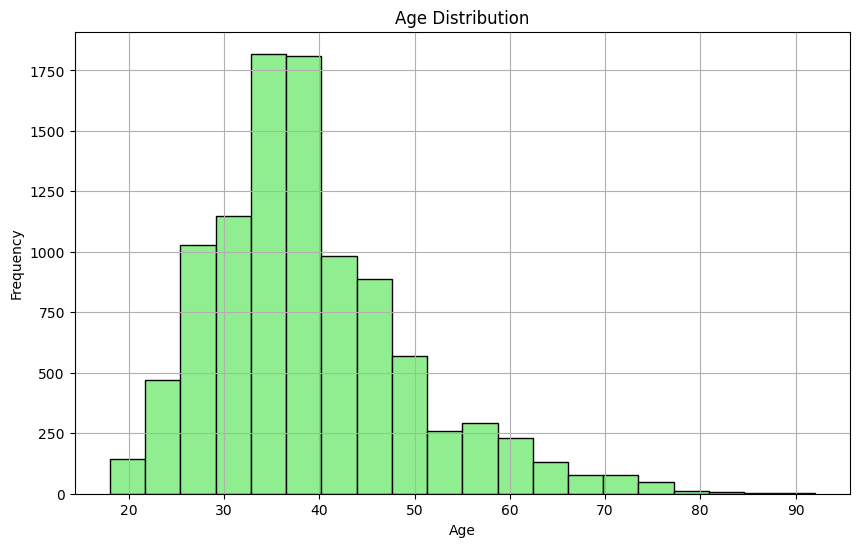

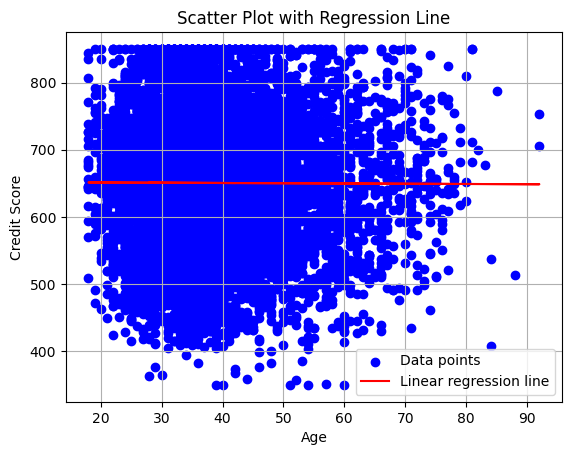

Conclusions and Insights based on the data:

1. Gender Distribution: The Bank has more male customers than female customers.

2. Geographical Distribution: The Bank has customers in France, Germany, and Spain. And most the Banks customers are in France

3. Credit Score: The meann for credit scores is 650, and the mode is 850. We can conlcude that most customer have a high credit score

4. Age Distribution: The age distribution of customers is positively skewed, indicating that there are more younger customers.

5. Tenure: The average tenure of customers is 5.01 years, with a mode of 2 years. We can conclude that most customers are new to the bank

6. Churn Rate: The churn rate, indicating the number of customers who leave the bank is 20.37%. 


Reflection from Assignment 1 and Assignment 2:

In completing Assignment 1 using Excel, I found that it provided a straightforward way to apply descriptive statistics and visualize data. However, Excel's capabilities are limited compared to Pyth

In [11]:
import csv
import statistics
import matplotlib.pyplot as plt
import requests
from io import StringIO
from scipy.stats import gmean, pearsonr, skew, kurtosis
import numpy as np
import pandas as pd

# Define the function to fetch CSV from GitHub
def read_csv_from_github(username, repository, filename):
    raw_file_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{filename}"
    response = requests.get(raw_file_url, verify=True)
    print("Response Status Code:", response.status_code)
    if response.status_code == 200:
        csv_content = response.text
        return csv_content
    else:
        print("Failed to fetch CSV file from GitHub.")
        print("Response Content:", response.text)
        print("Constructed URL:", raw_file_url)

# Function to count occurrences of male and female
def count_gender(csv_content, gender_column_index):
    male_count = 0
    female_count = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        gender = row[gender_column_index].lower()
        if gender == 'male':
            male_count += 1
        elif gender == 'female':
            female_count += 1

    return male_count, female_count

# Function to count occurrences of each country
def count_country(csv_content, country_column_index):
    France_count = 0
    Germany_count = 0
    Spain_count = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        country = row[country_column_index].lower() 
        if country == 'france':
            France_count += 1
        elif country == 'germany':
            Germany_count += 1
        elif country == 'spain':
            Spain_count += 1

    return France_count, Germany_count, Spain_count

# Function to count customers with and without credit cards
def count_customers_with_credit_cards(csv_content, credit_card_column_index):
    customers_with_credit_card = 0
    customers_without_credit_card = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader) 

    for row in csvreader:
        credit_card = row[credit_card_column_index].lower() 
        if credit_card == '1': 
            customers_with_credit_card += 1
        elif credit_card == '0':  
            customers_without_credit_card += 1

    return customers_with_credit_card, customers_without_credit_card

# Function to count active and inactive customers
def count_active_customers(csv_content, active_column_index):
    active_customers = 0
    inactive_customers = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        active_status = row[active_column_index].lower() 
        if active_status == '1':  
            active_customers += 1
        elif active_status == '0':  
            inactive_customers += 1

    return active_customers, inactive_customers

# Function to count customers with zero balance
def count_customers_with_zero_balance(csv_content, balance_column_index):
    customers_with_zero_balance = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        balance = float(row[balance_column_index])  
        if balance == 0:
            customers_with_zero_balance += 1

    return customers_with_zero_balance


# Function to count churned or not churned 
def count_churnrate(csv_content, country_column_index):
    churnned_count = 0
    notchurn_count = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        churn = row[churn_column_index].lower()  
        if churn == '1':
            churnned_count += 1
        elif churn == '0':
            notchurn_count += 1

    return churnned_count, notchurn_count

# Function to count churned or not churned for males and females
def count_churn_gender(csv_content, gender_column_index, churn_column_index):
    churnned_male_count = 0
    churnned_female_count = 0
    male_count = 0
    female_count = 0

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)

    for row in csvreader:
        gender = row[gender_column_index].lower()  
        churn = row[churn_column_index].lower() 
        if gender == 'male':
            male_count += 1
            if churn == '1':
                churnned_male_count += 1
        elif gender == 'female':
            female_count += 1
            if churn == '1':
                churnned_female_count += 1

    return churnned_male_count, churnned_female_count, male_count, female_count
    
# Function to count churned or not churned for each country
def count_churn_country(csv_content, country_column_index, churn_column_index):
    churnned_counts = {'france': 0, 'germany': 0, 'spain': 0}  
    notchurn_counts = {'france': 0, 'germany': 0, 'spain': 0}  

    csvreader = csv.reader(StringIO(csv_content))
    next(csvreader)  

    for row in csvreader:
        country = row[country_column_index].lower()  
        churn = row[churn_column_index].lower()  
        if churn == '1':
            churnned_counts[country] += 1
        elif churn == '0':
            notchurn_counts[country] += 1

    return churnned_counts, notchurn_counts

def calculate_weighted_mean(data, weights):
    if len(data) != len(weights):
        raise ValueError("Lengths of data and weights must be equal")

    weighted_sum = sum(value * weight for value, weight in zip(data, weights))

    sum_weights = sum(weights)

    weighted_mean = weighted_sum / sum_weights

    return weighted_mean

# Fetch CSV content
csv_content = read_csv_from_github("Quintin123", "-241ISM8X04-LEARNING-FROM-DATA", "Bank Customer Churn Prediction.csv")

# Write CSV content to a file
csv_file_path = "Bank_Customer_Churn_Prediction.csv"
with open(csv_file_path, 'w') as file:
    file.write(csv_content)

# Calculate statistics
def calculate_statistics(csv_file_path):
    # Create empty lists to store column values
    CreditScore_List = []
    Age_List = []
    Tenure_List = []
    Balance_List = []
    Products_List = []
    CreditCard_List = []
    ActiveMember_List = []
    EstimatedSalary_List = []
    Churn_List = []

    with open(csv_file_path, 'r') as file:
        csvreader = csv.reader(file)
        next(csvreader)

        for row in csvreader:
            try:
                CreditScore_List.append(float(row[1]))
                Age_List.append(float(row[4]))
                Tenure_List.append(float(row[5]))
                Balance_List.append(float(row[6]))
                Products_List.append(float(row[7]))
                CreditCard_List.append(float(row[8]))
                ActiveMember_List.append(float(row[9]))
                EstimatedSalary_List.append(float(row[10]))
                Churn_List.append(float(row[11]))
            except ValueError:
                continue

    # Calculate means
    MeanCredit = statistics.mean(CreditScore_List)
    MeanAge = statistics.mean(Age_List)
    MeanTenure = statistics.mean(Tenure_List)
    MeanBalance = statistics.mean(Balance_List)
    MeanProducts = statistics.mean(Products_List)
    MeanChurn = statistics.mean(Churn_List)
    MeanActiveMember = statistics.mean(ActiveMember_List)
    MeanEstimatedSalary = statistics.mean(EstimatedSalary_List)

    # Calculate weighted means 
    weights = [1] * len(CreditScore_List)  
    WeightedMeanCredit = calculate_weighted_mean(CreditScore_List, weights)
    WeightedMeanAge = calculate_weighted_mean(Age_List, weights)
    WeightedMeanTenure = calculate_weighted_mean(Tenure_List, weights)
    WeightedMeanBalance = calculate_weighted_mean(Balance_List, weights)
    WeightedMeanProducts = calculate_weighted_mean(Products_List, weights)
    WeightedMeanChurn = calculate_weighted_mean(Churn_List, weights)
    WeightedMeanActiveMember = calculate_weighted_mean(ActiveMember_List, weights)
    WeightedMeanEstimatedSalary = calculate_weighted_mean(EstimatedSalary_List, weights)

    # Calculate geometric means
    GeometricMeanCredit = gmean(CreditScore_List)
    GeometricMeanAge = gmean(Age_List)
    GeometricMeanTenure = gmean(Tenure_List)
    GeometricMeanBalance = gmean(Balance_List)
    GeometricMeanProducts = gmean(Products_List)
    GeometricMeanChurn = gmean(Churn_List)
    GeometricMeanActiveMember = gmean(ActiveMember_List)
    GeometricMeanEstimatedSalary = gmean(EstimatedSalary_List)

    # Calculate modes
    ModeCredit = statistics.mode(CreditScore_List) if CreditScore_List else None
    ModeAge = statistics.mode(Age_List) if Age_List else None
    ModeTenure = statistics.mode(Tenure_List) if Tenure_List else None
    ModeBalance = statistics.mode(Balance_List) if Balance_List else None
    ModeProducts = statistics.mode(Products_List) if Products_List else None
    ModeChurn = statistics.mode(Churn_List) if Churn_List else None
    ModeActiveMember = statistics.mode(ActiveMember_List) if ActiveMember_List else None
    ModeEstimatedSalary = statistics.mode(EstimatedSalary_List) if EstimatedSalary_List else None

    # Calculate variances
    VarianceCredit = statistics.variance(CreditScore_List) if len(CreditScore_List) > 1 else None
    VarianceAge = statistics.variance(Age_List) if len(Age_List) > 1 else None
    VarianceTenure = statistics.variance(Tenure_List) if len(Tenure_List) > 1 else None
    VarianceBalance = statistics.variance(Balance_List) if len(Balance_List) > 1 else None
    VarianceProducts = statistics.variance(Products_List) if len(Products_List) > 1 else None
    VarianceChurn = statistics.variance(Churn_List) if len(Churn_List) > 1 else None
    VarianceActiveMember = statistics.variance(ActiveMember_List) if len(ActiveMember_List) > 1 else None
    VarianceEstimatedSalary = statistics.variance(EstimatedSalary_List) if len(EstimatedSalary_List) > 1 else None

    # Calculate standard deviations
    StdDevCredit = statistics.stdev(CreditScore_List) if len(CreditScore_List) > 1 else None
    StdDevAge = statistics.stdev(Age_List) if len(Age_List) > 1 else None
    StdDevTenure = statistics.stdev(Tenure_List) if len(Tenure_List) > 1 else None
    StdDevBalance = statistics.stdev(Balance_List) if len(Balance_List) > 1 else None
    StdDevProducts = statistics.stdev(Products_List) if len(Products_List) > 1 else None
    StdDevChurn = statistics.stdev(Churn_List) if len(Churn_List) > 1 else None
    StdDevActiveMember = statistics.stdev(ActiveMember_List) if len(ActiveMember_List) > 1 else None
    StdDevEstimatedSalary = statistics.stdev(EstimatedSalary_List) if len(EstimatedSalary_List) > 1 else None

    # Calculate correlation
    correlation_credit_age = pearsonr(CreditScore_List, Age_List)[0]
    correlation_credit_salary = pearsonr(CreditScore_List, EstimatedSalary_List)[0]

    # Calculate quartiles
    Q1_CreditScore = np.percentile(CreditScore_List, 25)
    Q2_CreditScore = np.percentile(CreditScore_List, 50)  # Median
    Q3_CreditScore = np.percentile(CreditScore_List, 75)

    Q1_Age = np.percentile(Age_List, 25)
    Q2_Age = np.percentile(Age_List, 50)  # Median
    Q3_Age = np.percentile(Age_List, 75)

    Q1_Tenure = np.percentile(Tenure_List, 25)
    Q2_Tenure = np.percentile(Tenure_List, 50)  # Median
    Q3_Tenure = np.percentile(Tenure_List, 75)

    Q1_Churn = np.percentile(Churn_List, 25)
    Q2_Churn = np.percentile(Churn_List, 50)  # Median
    Q3_Churn = np.percentile(Churn_List, 75)

    Q1_Balance = np.percentile(Balance_List, 25)
    Q2_Balance = np.percentile(Balance_List, 50)  # Median
    Q3_Balance = np.percentile(Balance_List, 75)

    Q1_Products= np.percentile(Products_List, 25)
    Q2_Products = np.percentile(Products_List, 50)  # Median
    Q3_Products = np.percentile(Products_List, 75)

    Q1_CreditCard = np.percentile(CreditCard_List, 25)
    Q2_CreditCard = np.percentile(CreditCard_List, 50)  # Median
    Q3_CreditCard = np.percentile(CreditCard_List, 75)

    Q1_AcvtiveMember = np.percentile(ActiveMember_List, 25)
    Q2_AcvtiveMember = np.percentile(ActiveMember_List, 50)  # Median
    Q3_AcvtiveMember = np.percentile(ActiveMember_List, 75)

    Q1_EstimatedSalary = np.percentile(EstimatedSalary_List, 25)
    Q2_EstimatedSalary = np.percentile(EstimatedSalary_List, 50)  # Median
    Q3_EstimatedSalary = np.percentile(EstimatedSalary_List, 75)

    # Calculate interquartile range (IQR)
    IQR_CreditScore = np.percentile(CreditScore_List, 75) - np.percentile(CreditScore_List, 25)
    IQR_Age = np.percentile(Age_List, 75) - np.percentile(Age_List, 25)
    IQR_Tenure = np.percentile(Tenure_List, 75) - np.percentile(Tenure_List, 25)
    IQR_Balance = np.percentile(Balance_List, 75) - np.percentile(Balance_List, 25)
    IQR_Products = np.percentile(Products_List, 75) - np.percentile(Products_List, 25)
    IQR_CreditCard = np.percentile(CreditCard_List, 75) - np.percentile(CreditCard_List, 25)
    IQR_ActiveMember = np.percentile(ActiveMember_List, 75) - np.percentile(ActiveMember_List, 25)
    IQR_EstimatedSalary = np.percentile(EstimatedSalary_List, 75) - np.percentile(EstimatedSalary_List, 25)
    IQR_Churn = np.percentile(Churn_List, 75) - np.percentile(Churn_List, 25)

    # Calculate range
    Range_CreditScore = max(CreditScore_List) - min(CreditScore_List)
    Range_Age = max(Age_List) - min(Age_List)
    Range_Tenure = max(Tenure_List) - min(Tenure_List)
    Range_Balance = max(Balance_List) - min(Balance_List)
    Range_Products = max(Products_List) - min(Products_List)
    Range_CreditCard = max(CreditScore_List) - min(CreditScore_List)
    Range_AciveMemeber = max(ActiveMember_List) - min(ActiveMember_List)
    Range_EstimatedSalary = max(EstimatedSalary_List) - min(EstimatedSalary_List)
    Range_Churn = max(Churn_List) - min(Churn_List)

    # Calculate skewness
    Skewness_CreditScore = skew(CreditScore_List)
    Skewness_Age = skew(Age_List)
    Skewness_Tenure = skew(Tenure_List)
    Skewness_Churn = skew(Churn_List)
    Skewness_Balance = skew(Balance_List)
    Skewness_Products = skew(Products_List)
    Skewness_CreditCard = skew(CreditCard_List)
    Skewness_ActiveMember = skew(ActiveMember_List)
    Skewness_EstimatedSalary = skew(EstimatedSalary_List)

    # Calculate kurtosis
    Kurtosis_CreditScore = kurtosis(CreditScore_List)
    Kurtosis_Age = kurtosis(Age_List)
    Kurtosis_Tenure = kurtosis(Tenure_List)
    Kurtosis_Churn = kurtosis(Churn_List)
    Kurtosis_Balance = kurtosis(Balance_List)
    Kurtosis_Products = kurtosis(Products_List)
    Kurtosis_CreditCard = kurtosis(CreditCard_List)
    Kurtosis_ActiveMemeber = kurtosis(ActiveMember_List)
    Kurtosis_EstimatedSalary = kurtosis(EstimatedSalary_List)

    return {
            "MeanCredit": MeanCredit,
            "MeanAge": MeanAge,
            "MeanTenure": MeanTenure,
            "MeanBalance": MeanBalance,
            "MeanProducts": MeanProducts,
            "MeanChurn": MeanChurn,
            "MeanActiveMember": MeanActiveMember,
            "MeanEstimatedSalary": MeanEstimatedSalary,
    
            "WeightedMeanCredit": WeightedMeanCredit,
            "WeightedMeanAge": WeightedMeanAge,
            "WeightedMeanTenure": WeightedMeanTenure,
            "WeightedMeanBalance": WeightedMeanBalance,
            "WeightedMeanProducts": WeightedMeanProducts,
            "WeightedMeanChurn": WeightedMeanChurn,
            "WeightedMeanActiveMember": WeightedMeanActiveMember,
            "WeightedMeanEstimatedSalary": WeightedMeanEstimatedSalary,
    
            "GeometricMeanCredit": GeometricMeanCredit,
            "GeometricMeanAge": GeometricMeanAge,
            "GeometricMeanTenure": GeometricMeanTenure,
            "GeometricMeanBalance": GeometricMeanBalance,
            "GeometricMeanProducts": GeometricMeanProducts,
            "GeometricMeanChurn": GeometricMeanChurn,
            "GeometricMeanActiveMember": GeometricMeanActiveMember,
            "GeometricMeanEstimatedSalary": GeometricMeanEstimatedSalary,
    
            "ModeCredit": ModeCredit,
            "ModeAge": ModeAge,
            "ModeTenure": ModeTenure,
            "ModeBalance": ModeBalance,
            "ModeProducts": ModeProducts,
            "ModeChurn": ModeChurn,
            "ModeActiveMember": ModeActiveMember,
            "ModeEstimatedSalary": ModeEstimatedSalary,
    
            "VarianceCredit": VarianceCredit,
            "VarianceAge": VarianceAge,
            "VarianceTenure": VarianceTenure,
            "VarianceBalance": VarianceBalance,
            "VarianceProducts": VarianceProducts,
            "VarianceChurn": VarianceChurn,
            "VarianceActiveMember": VarianceActiveMember,
            "VarianceEstimatedSalary": VarianceEstimatedSalary,
    
            "StdDevCredit": StdDevCredit,
            "StdDevAge": StdDevAge,
            "StdDevTenure": StdDevTenure,
            "StdDevBalance": StdDevBalance,
            "StdDevProducts": StdDevProducts,
            "StdDevChurn": StdDevChurn,
            "StdDevActiveMember": StdDevActiveMember,
            "StdDevEstimatedSalary": StdDevEstimatedSalary,
    
            "CorrelationCreditAge": correlation_credit_age,
            "CorrelationCreditSalary": correlation_credit_salary,
    
            "Interquartile_CreditScore": IQR_CreditScore,
            "Interquartile_Age": IQR_Age,
            "Interquartile_Tenure": IQR_Tenure,
            "Interquartile_Balance": IQR_Balance,
            "Interquartile_Products": IQR_Products,
            "Interquartile_Churn": IQR_Churn,
            "Interquartile_ActiveMember": IQR_ActiveMember,
            "Interquartile_EstimatedSalary": IQR_EstimatedSalary,

            "Percentile1_CreditScore": Q1_CreditScore,
            "Percentile2_CreditScore": Q2_CreditScore,
            "Percentile3_CreditScore": Q3_CreditScore,
        
            "Percentile1_Age": Q1_Age,
            "Percentile2_Age": Q2_Age,
            "Percentile3_Age": Q3_Age,

            "Percentile1_Tenure": Q1_Tenure,
            "Percentile2_Tenure": Q2_Tenure,
            "Percentile3_Tenure": Q3_Tenure,

            "Percentile1_Balance": Q1_Balance,
            "Percentile2_Balance": Q2_Balance,
            "Percentile3_Balance": Q3_Balance,

            "Percentile1_Products": Q1_Products,
            "Percentile2_Products": Q2_Products,
            "Percentile3_Products": Q3_Products,

            "Percentile1_Churn": Q1_Churn,
            "Percentile2_Churn": Q2_Churn,
            "Percentile3_Churn": Q3_Churn,

            "Percentile1_ActiveMember": Q1_AcvtiveMember,
            "Percentile2_ActiveMember": Q2_AcvtiveMember,
            "Percentile3_ActiveMember": Q3_AcvtiveMember,

            "Percentile1_EstimatedSalary": Q1_EstimatedSalary,
            "Percentile2_EstimatedSalary": Q2_EstimatedSalary,
            "Percentile3_EstimatedSalary": Q3_EstimatedSalary,
    
            "Range_CreditScore": Range_CreditScore,
            "Range_Age": Range_Age,
            "Range_Tenure": Range_Tenure,
            "Range_Balance": Range_Balance,
            "Range_Products": Range_Products,
            "Range_Churn": Range_Churn,
            "Range_ActiveMember": Range_AciveMemeber,
            "Range_EstimatedSalary": Range_EstimatedSalary,
       
            "Skewness_CreditScore": Skewness_CreditScore,
            "Skewness_Age": Skewness_Age,
            "Skewness_Tenure": Skewness_Tenure,
            "Skewness_Balance": Skewness_Balance,
            "Skewness_Products": Skewness_Products,
            "Skewness_Churn": Skewness_Churn,
            "Skewness_ActiveMember": Skewness_ActiveMember,
            "Skewness_EstimatedSalary": Skewness_EstimatedSalary,
    
            "Kurtosis_CreditScore": Kurtosis_CreditScore,
            "Kurtosis_Age": Kurtosis_Age,
            "Kurtosis_Tenure": Kurtosis_Tenure,
            "Kurtosis_Balance": Kurtosis_Balance,
            "Kurtosis_Products": Kurtosis_Products,
            "Kurtosis_Churn": Kurtosis_Churn,
            "Kurtosis_ActiveMember": Kurtosis_ActiveMemeber,
            "Kurtosis_EstimatedSalary": Kurtosis_EstimatedSalary,
                
            "Age_List": Age_List
        }

gender_column_index = 3
male_count, female_count = count_gender(csv_content, gender_column_index)

country_column_index = 2
France_count, Germany_count, Spain_count = count_country(csv_content, country_column_index)

churn_column_index = 11
churnned_count, notchurn_count = count_churnrate(csv_content, churn_column_index)

churnned_male_count, churnned_female_count, male_count, female_count = count_churn_gender(csv_content, gender_column_index, churn_column_index)

churn_rate_male = (churnned_male_count / male_count) * 100
churn_rate_female = (churnned_female_count / female_count) * 100

churnned_counts, notchurn_counts = count_churn_country(csv_content, country_column_index, churn_column_index)

# Calculate churn rate for each country
churn_rates_by_country = {}
for country in churnned_counts:
    total_customers = churnned_counts[country] + notchurn_counts[country]
    churn_rate = (churnned_counts[country] / total_customers) * 100
    churn_rates_by_country[country] = churn_rate


balance_column_index = 6  
activity_column_index = 9  
credit_card_column_index = 8 
zero_balance_customers = count_customers_with_zero_balance(csv_content, balance_column_index)
active_customers = count_active_customers(csv_content, activity_column_index)
customers_with_credit_cards, _ = count_customers_with_credit_cards(csv_content, credit_card_column_index)

# Calculate statistics and store them in column_stats
column_stats = calculate_statistics(csv_file_path)

# Print statistics
print("Male count:", male_count)
print("Female count:", female_count)
print()
print("France count:", France_count)
print("Germany count:", Germany_count)
print("Spain count:", Spain_count)
print()

print("Credit Score:")
print("Mean:", column_stats.get("MeanCredit", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanCredit", "N/A"))
print("Mode:", column_stats.get("ModeCredit", "N/A"))
print("Variance:", column_stats.get("VarianceCredit", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevCredit", "N/A"))
print("Range for credit score:", column_stats.get("Range_CreditScore", "N/A"))
print("Q1 for credit score:", column_stats.get("Percentile1_CreditScore", "N/A"))
print("Q2 for credit score:", column_stats.get("Percentile2_CreditScore", "N/A"))
print("Q3 for credit score:", column_stats.get("Percentile3_CreditScore", "N/A"))
print("Skewness for credit score:", column_stats.get("Skewness_CreditScore", "N/A"))
print("Kurtosis for credit score:", column_stats.get("Kurtosis_CreditScore", "N/A"))
print()

print("Age:")
print("Mean:", column_stats.get("MeanAge", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanAge", "N/A"))
print("Mode:", column_stats.get("ModeAge", "N/A"))
print("Variance:", column_stats.get("VarianceAge", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevAge", "N/A"))
print("Range for age:", column_stats.get("Range_Age", "N/A"))
print("Q1 for age:", column_stats.get("Percentile1_Age", "N/A"))
print("Q2 for age:", column_stats.get("Percentile2_Age", "N/A"))
print("Q3 for age:", column_stats.get("Percentile3_Age", "N/A"))
print("Skewness for age:", column_stats.get("Skewness_Age", "N/A"))
print("Kurtosis for age:", column_stats.get("Kurtosis_Age", "N/A"))
print()

print("The correlation between age and credit score:", column_stats.get("CorrelationCreditAge", "N/A"))
print()

print("Tenure:")
print("Mean:", column_stats.get("MeanTenure", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanTenure", "N/A"))
print("Mode:", column_stats.get("ModeTenure", "N/A"))
print("Variance:", column_stats.get("VarianceTenure", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevTenure", "N/A"))
print("Range for tenure:", column_stats.get("Range_Tenure", "N/A"))
print("Q1 for tenure:", column_stats.get("Percentile1_Tenure", "N/A"))
print("Q2 for tenure:", column_stats.get("Percentile2_Tenure", "N/A"))
print("Q3 for tenure:", column_stats.get("Percentile3_Tenure", "N/A"))
print("Skewness for tenure:", column_stats.get("Skewness_Tenure", "N/A"))
print("Kurtosis for tenure:", column_stats.get("Kurtosis_Tenure", "N/A"))
print()

print("Balance:")
print("Mean:", column_stats.get("MeanBalance", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanBalance", "N/A"))
print("Mode:", column_stats.get("ModeBalance", "N/A"))
print("Variance:", column_stats.get("VarianceBalance", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevBalance", "N/A"))
print("Range for balance:", column_stats.get("Range_Balance", "N/A"))
print("Q1 for balance:", column_stats.get("Percentile1_Balance", "N/A"))
print("Q2 for balance:", column_stats.get("Percentile2_Balance", "N/A"))
print("Q3 for balance:", column_stats.get("Percentile3_Balance", "N/A"))
print("Skewness for balance:", column_stats.get("Skewness_Balance", "N/A"))
print("Kurtosis for balance:", column_stats.get("Kurtosis_Balance", "N/A"))
print()

print("Products:")
print("Mean:", column_stats.get("MeanProducts", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanProducts", "N/A"))
print("Mode:", column_stats.get("ModeProducts", "N/A"))
print("Variance:", column_stats.get("VarianceProducts", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevProducts", "N/A"))
print("Range for products:", column_stats.get("Range_Products", "N/A"))
print("Q1 for products:", column_stats.get("Percentile1_Products", "N/A"))
print("Q2 for products:", column_stats.get("Percentile2_Products", "N/A"))
print("Q3 for products:", column_stats.get("Percentile3_Products", "N/A"))
print("Skewness for products:", column_stats.get("Skewness_Products", "N/A"))
print("Kurtosis for products:", column_stats.get("Kurtosis_Products", "N/A"))
print()

print("Churn:")
print("Mean:", column_stats.get("MeanChurn", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanChurn", "N/A"))
print("Mode:", column_stats.get("ModeChurn", "N/A"))
print("Variance:", column_stats.get("VarianceChurn", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevChurn", "N/A"))
print("Range for Churn:", column_stats.get("Range_Churn", "N/A"))
print("Q1 for Churn:", column_stats.get("Percentile1_Churn", "N/A"))
print("Q2 for Churn:", column_stats.get("Percentile2_Churn", "N/A"))
print("Q3 for Churn:", column_stats.get("Percentile3_Churns", "N/A"))
print("Skewness for Churn:", column_stats.get("Skewness_Churn", "N/A"))
print("Kurtosis for Churn:", column_stats.get("Kurtosis_Churn", "N/A"))
print()

print("Active Member:")
print("Mean:", column_stats.get("MeanActiveMember", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanActiveMember", "N/A"))
print("Mode:", column_stats.get("ModeActiveMember", "N/A"))
print("Variance:", column_stats.get("VarianceActiveMember", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevActiveMember", "N/A"))
print("Range for Active Member:", column_stats.get("Range_ActiveMember", "N/A"))
print("Q1 for Active Membere Member:", column_stats.get("Percentile2_ActiveMember", "N/A"))
print("Q3 for Active Member:", column_stats.get("Percentile3_ActiveMember", "N/A"))
print("Skewness for Active Member:", column_stats.get("Skewness_ActiveMember", "N/A"))
print("Kurtosis for Active Member:", column_stats.get("Kurtosis_ActiveMember", "N/A"))
print()

print("Estimated Salary:")
print("Mean:", column_stats.get("MeanEstimatedSalary", "N/A"))
print("Geometric Mean:", column_stats.get("GeometricMeanEstimatedSalary", "N/A"))
print("Mode:", column_stats.get("ModeEstimatedSalary", "N/A"))
print("Variance:", column_stats.get("VarianceEstimatedSalary", "N/A"))
print("Standard Deviation:", column_stats.get("StdDevEstimatedSalary", "N/A"))
print("Range for estimated salary:", column_stats.get("Range_EstimatedSalary", "N/A"))
print("Q1 for estimated salary:", column_stats.get("Percentile1_EstimatedSalary", "N/A"))
print("Q2 for estimated salary:", column_stats.get("Percentile2_EstimatedSalary", "N/A"))
print("Q3 for estimated salary:", column_stats.get("Percentile3_EstimatedSalary", "N/A"))
print("Skewness for estimated salary:", column_stats.get("Skewness_EstimatedSalary", "N/A"))
print("Kurtosis for estimated salary:", column_stats.get("Kurtosis_EstimatedSalary", "N/A"))
print()


# Pie chart labels and data for gender distribution
gender_labels = ['Male', 'Female']
gender_sizes = [male_count, female_count]

print("Gender labels:", gender_labels)
print("Gender sizes:", gender_sizes)

# Plot pie chart for gender distribution with improved styling and legend
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')
plt.legend(title="Gender", loc="upper right", fontsize=10)
plt.show()

print()

# Bar graph labels and data for gender distribution
gender_labels = ['Male', 'Female']
gender_counts = [male_count, female_count]

print("Gender labels:", gender_labels)
print("Gender counts:", gender_counts)

colors = ['lightblue', 'lightcoral']

# Plot bar graph for gender distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_labels, gender_counts, color=colors)

for bar, count in zip(bars, gender_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(gender_labels, loc='upper right')

plt.show()

print()

# Pie chart labels and data for country distribution
country_labels = ['France', 'Germany', 'Spain']
country_population = [France_count, Germany_count, Spain_count]

print("Country labels:", country_labels)
print("Country population:", country_population)

# Plot pie chart for country distribution with improved styling and legend
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(country_population, labels=country_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Bank Customer Distribution by Country')
plt.axis('equal')
plt.legend(title="Country", loc="upper right", fontsize=10)
plt.show()

print()
print()

# Bar graph labels and data for gender distribution
churn_labels = ['Churnned', 'Not Churn']
churn_counts = [churnned_count, notchurn_count]

print("Churn labels:", churn_labels)
print("Churn counts:", churn_counts)

plt.figure(figsize=(8, 6))
plt.bar(churn_labels, churn_counts, color=['lightblue', 'lightcoral'])
plt.title('Bank Customer Churn Rate')
plt.xlabel('Churn Rate')
plt.ylabel('Count')
plt.show()

print()
print()

print("Churn Rate for Males:", churn_rate_male)
print("Churn Rate for Females:", churn_rate_female)

# Bar graph labels and data for churn rate by gender
gender_labels = ['Male', 'Female']
churn_rates = [churn_rate_male, churn_rate_female]

# Plot grouped bar graph for churn rate by gender
plt.figure(figsize=(8, 6))
bar_width = 0.35
r1 = np.arange(len(gender_labels))
r2 = [x + bar_width for x in r1]
plt.bar(r1, churn_rates, color='#66b3ff', width=bar_width, edgecolor='grey', label='Churn Rate')
plt.xlabel('Gender', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(gender_labels))], gender_labels)
plt.ylabel('Churn Rate (%)', fontweight='bold')
plt.title('Churn Rate by Gender')
plt.legend()
plt.show()

print()

print("Churn Rates by Country:")
for country, churn_rate in churn_rates_by_country.items():
    print(f"{country}: {churn_rate:.2f}%")


# Plot horizontal bar graph for churn rate by country
plt.figure(figsize=(10, 6))
plt.barh(list(churn_rates_by_country.keys()), churn_rates_by_country.values(), color='#66b3ff')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Country')
plt.title('Churn Rate by Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print()

print("Zero Balance Customers:", zero_balance_customers)
print("Active Customers:", active_customers)
print("Customers with Credit Cards:", customers_with_credit_cards)

# Separate the counts for active and inactive customers
active_count, inactive_count = active_customers

counts = [zero_balance_customers, active_count, customers_with_credit_cards]

# Plot the bar graph
categories = ['Zero Balance Customers', 'Active Customers', 'Customers with Credit Cards']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Customer Segmentation')
plt.show()
print()

# Calculate statistics and store them in column_stats
column_stats = calculate_statistics(csv_file_path)

# Get Age_List from column_stats
Age_List = column_stats["Age_List"]

# Box plot for Age
plt.figure(figsize=(8, 6))
plt.boxplot(Age_List, vert=False, patch_artist=True, notch=True)
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print()

# Histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(Age_List, bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Open the CSV file
with open(csv_file_path, 'r') as file:
    csvreader = csv.reader(file)
    
    column_values = []
    column_values2 = []

    for row in csvreader:
        try:
            column_values.append(float(row[4]))  # Age
            column_values2.append(float(row[1]))  # Credit Score
        except ValueError:
            continue

x = np.array(column_values)
y = np.array(column_values2)

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.scatter(x, y, label='Data points', color='blue')  

plt.plot(x, regression_line, color='red', label='Linear regression line')  

plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# My conclusions and insights 
print('Conclusions and Insights based on the data:')
print()
print('1. Gender Distribution: The Bank has more male customers than female customers.')
print()
print('2. Geographical Distribution: The Bank has customers in France, Germany, and Spain. And most the Banks customers are in France')
print()
print('3. Credit Score: The meann for credit scores is 650, and the mode is 850. We can conlcude that most customer have a high credit score')
print()
print('4. Age Distribution: The age distribution of customers is positively skewed, indicating that there are more younger customers.')
print()
print('5. Tenure: The average tenure of customers is 5.01 years, with a mode of 2 years. We can conclude that most customers are new to the bank')
print()
print('6. Churn Rate: The churn rate, indicating the number of customers who leave the bank is 20.37%. ')
print()
print()
# My Reflection from Assignment 1 and Assignment 2
print('Reflection from Assignment 1 and Assignment 2:')
print()
print("In completing Assignment 1 using Excel, I found that it provided a straightforward way to apply descriptive statistics and visualize data. However, Excel's capabilities are limited compared to Python libraries like Pandas and Matplotlib used in Assignment 2. Python allows for more complex data manipulation, analysis, and visualization, making it more suitable for handling large datasets and advanced statistical analysis.")
print()
print("When deciding between Excel and Python, I would choose Excel for quick exploratory data analysis or simple calculations and Python for more in-depth analysis requiring advanced statistical techniques or machine learning algorithms.")
print()
print("If I were to redo this assignment, I would focus on improving the visual aesthetics of the Excel workbook by using more varied chart types and enhancing the layout for better readability.")
print()
print("The gap in my knowledge lies in applying more advanced statistical techniques and machine learning algorithms in Python. I would like to further develop my skills in data cleaning, and model evaluation to tackle more complex datasets effectively. Additionally, I aim to deepen my understanding of statistical concepts to make more informed decisions in data analysis and interpretation.")
print()
# Link to my Github repositoty: https://github.com/Quintin123/-241ISM8X04-LEARNING-FROM-DATA

print("Link to my Github repository: ")
print("https://github.com/Quintin123/-241ISM8X04-LEARNING-FROM-DATA")
